## Distances PCNA-DNA

a)Import the modules

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import itertools

/home/oriol/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/oriol/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


a)Load a compiled trajectory

In [12]:
file = "1_t3_141"
top_file = "frame1t_Protein_DNA.gro"
file_list = "/home/oriol/calculs/test/trajectories/it_traj/traj{}.xtc".format(file)
all_traj = md.load(file_list , top='/home/oriol/calculs/test/WESTPA/gromacs_config/{}'.format(top_file))
print(all_traj)

<mdtraj.Trajectory with 130 frames, 15139 atoms, 897 residues, and unitcells>


b)Selection of atoms to measure the distances between PCNA and DNA

In [13]:
top = all_traj.topology
ca = {}
ca[1] = top.select('sidechain and type N and resid 0 to 254')
ca[2] = top.select('sidechain and type N and resid 255 to 509')
ca[3] = top.select('sidechain and type N and resid 510 to 764')
P = top.select('name P')
cp = {}
cp[1] = P[:39]
cp[2] = P[39:]

c)Measure and plot of minimum distances between DNA and each chain of PCNA

In [14]:
dist = {}
for key in ca:
    pair_array = np.array(list(itertools.product(ca[key],P)))
    dist[key] = np.amin(md.compute_distances(all_traj, pair_array), axis=1)  

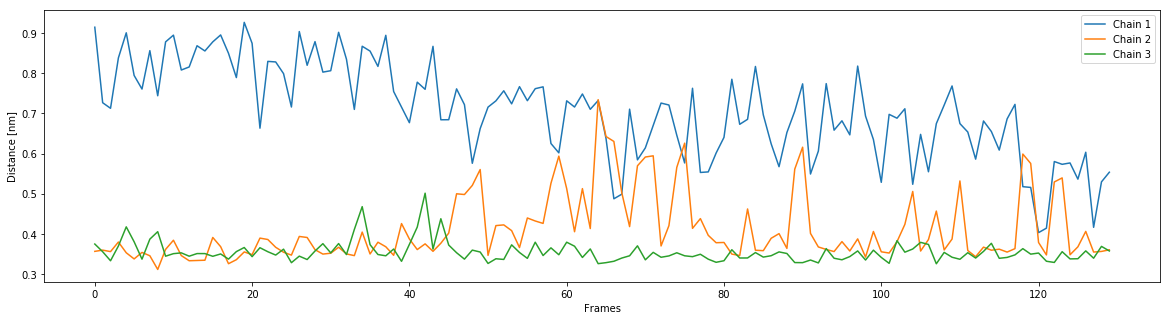

In [15]:
plt.figure(1, figsize=(20,5))
line1 = plt.plot(dist[1], label = 'Chain 1')
line2 = plt.plot(dist[2], label = 'Chain 2')
line3 = plt.plot(dist[3], label = 'Chain 3')
plt.xlabel("Frames")
plt.ylabel("Distance [nm]")
plt.legend()
plt.savefig("Dist_1chain_{}.png".format(file))
plt.show()

d)Measure and plot of minimum distances between each strand of DNA and each chain of PCNA

In [16]:
dist_2ch = {}
for key in ca:
    for strand in cp:
        pair_array = np.array(list(itertools.product(ca[key],cp[strand])))
        new_key = "{}_{}".format(key,strand)
        dist_2ch[new_key] = np.amin(md.compute_distances(all_traj, pair_array), axis=1)  

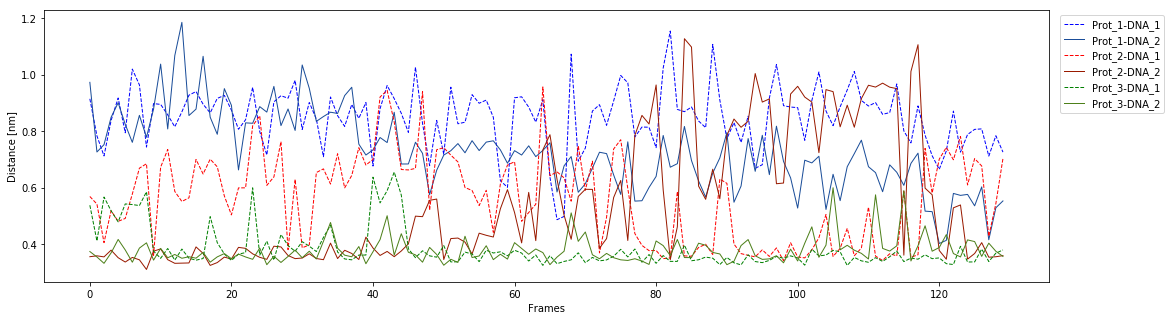

In [17]:
plt.figure(1, figsize=(18,5))
line1_1 = plt.plot(dist_2ch["1_1"], 'b--', linewidth =1, label = "Prot_1-DNA_1")
line1_2 = plt.plot(dist_2ch["1_2"], color=(0.1,0.3,0.6), linewidth =1, label = "Prot_1-DNA_2")
line2_1 = plt.plot(dist_2ch["2_1"], 'r--', linewidth =1, label = "Prot_2-DNA_1")
line2_2 = plt.plot(dist_2ch["2_2"], color=(0.6,0.1,0) , linewidth =1, label = "Prot_2-DNA_2")
line3_1 = plt.plot(dist_2ch["3_1"], 'g--', linewidth =1, label = "Prot_3-DNA_1")
line3_2 = plt.plot(dist_2ch["3_2"], color=(0.3,0.5,0.1), linewidth =1, label = "Prot_3-DNA_2")
plt.xlabel("Frames")
plt.ylabel("Distance [nm]")
plt.legend(bbox_to_anchor=(1.12, 1))
plt.savefig("Dist_2chains_{}.png".format(file))
plt.show()